In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Log odds and odds

In [91]:
# the 'odds' : p/(1-p)
print(.8/(1-.8))
print(.82/(1-.82))

4.000000000000001
4.5555555555555545


In [94]:
# % chance of winning
# odds/(odds+1)
print(4/(4+1))
print(4.5/(4.5+1))
print(10/(10+1)) # example of a 10-1 favorite, % win
print(2/(2+1)) # example of a 2-1 favorite, % win

0.8
0.8181818181818182
0.9090909090909091
0.6666666666666666


### Estimating the regression coefficients for Logistic Regression pg. 133 vs LDA pg. 139

We use **_maximum liklihood_**: we seek estimates for $\hat\beta_0$ and $\hat\beta_1$ such that the predicted probability $\hat p(x_i)$ of a particular class for each individual corresponds as closely as possible to the individual’s observed class status.

The logistic function:
$$p(X) = \frac{{{e^{{\beta _0} + {\beta _1}x}}}}{{1 + {e^{{\beta _0} + {\beta _1}x}}}}$$

LDA classifiers, on the other hand, use the **_estimated mean and variance from a normal distribution_** to compute estimates.

LDA assumes that the observations within each class come from a gaussian (normal) distribution with a class-specific mean vector and a commor variance.


**True Positive (TP)** = hit

**True Negative (TN)** = correct rejection

**False Positive (FP)** = Type 1 error, (false alarm)

**False Negative (FN)** = Type 2 error, (a miss)

***

**Recall (TPR)**
* sensitivity
* hit rate
* true positive rate (TPR)
* TP/(TP+FN)
* 1-FNR

**Precision**
* positive predicted value (PPV)
* TP/(TP+FP)

**Specificity (TNR)**
* selectivity
* true negative rate (TNR)
* 1-FPR
* TN/(TN+FP)

**False positive rate (FPR)**
* fall out
* FP/(FP+TN)
* 1-TNR

**False negative rate (FNR)**
* miss rate
* FN/(FN+TP)
* 1-TPR

**Accuracy**
* how many overall did you get correct
* (tp + tn)/(tp + tn + fp +fn)
* Error rate = 1-accuracy (how many overall did you get wrong)

To make the connection with the epidemiology literature, we think of `positive` as the “disease” that we are trying to detect, and `negative` as the “non-disease” state. To make the connection to the classical hypothesis testing literature, we think of `negative` as the null hypothesis and `positive` as the alternative (non-null) hypothesis. In the context of the `Default` data, `positive` indicates an individual who defaults, and `negative` indicates one who does not.
<img src="https://cdn-images-1.medium.com/max/1600/1*Z54JgbS4DUwWSknhDCvNTQ.png">

In [4]:
# table 4.4 pg. 145
# threshold = p>0.5 (bayes default for 2-class case)

tn = 9644
fp = 23
fn = 252
tp = 81


recall = round((tp/(tp+fn) * 100), 1)
print("recall/sensitivity: " + str(recall))

precision = round((tp/(tp+fp) * 100), 1)
print("precision: " + str(precision))

specificity = round((tn/(tn+fp) * 100), 1)
print("specificity: " + str(specificity))

miss_rate = round((fn/(fn+tp) * 100), 1)
print("miss rate: " + str(miss_rate))

accuracy = (tp + tn)/(tp + tn + fp +fn)
print("accuracy: " + str(accuracy))
print("overall error rate: " + str(1-accuracy))

fpr = fp/(fp+tn)
print("fpr: " + str(fpr))

# FNR/miss_rate = 1-recall

recall/sensitivity: 24.3
precision: 77.9
specificity: 99.8
miss rate: 75.7
accuracy: 0.9725
overall error rate: 0.02749999999999997
fpr: 0.0023792283024723286


In [3]:
# table 4.5 pg. 146
# changed threshold = p>0.2

tn = 9432
tp = 195
fn = 138
fp = 235

recall = round((tp/(tp+fn) * 100), 1)
print("recall/sensitivity: " + str(recall))

precision = round((tp/(tp+fp) * 100), 1)
print("precision: " + str(precision))

specificity = round((tn/(tn+fp) * 100), 1)
print("specificity: " + str(specificity))

miss_rate = round((fn/(fn+tp) * 100), 1)
print("miss rate: " + str(miss_rate))

accuracy = round(((tp + tn)/(tp + tn + fp +fn) *100), 1)
print("accuracy: " + str(accuracy))
print("overall error rate: " + str(1-((tp + tn)/(tp + tn + fp + fn))))

fpr = fp/(fp+tn)
print("fpr: " + str(fpr))

recall/sensitivity: 58.6
precision: 45.3
specificity: 97.6
miss rate: 41.4
accuracy: 96.3
overall error rate: 0.0373
fpr: 0.02430950656873901


## Lab

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Smarket.csv')
df=df.drop(columns=['Unnamed: 0'])
print("Shape: " + str(df.shape))
df.head()

Shape: (1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [12]:
# numericals
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [14]:
# categoricals
df.describe(include='object')

,Direction
count,1250
unique,2
top,Up
freq,648


#### Scatterplot Matrix
equivalent to `pairs()` in `R`.

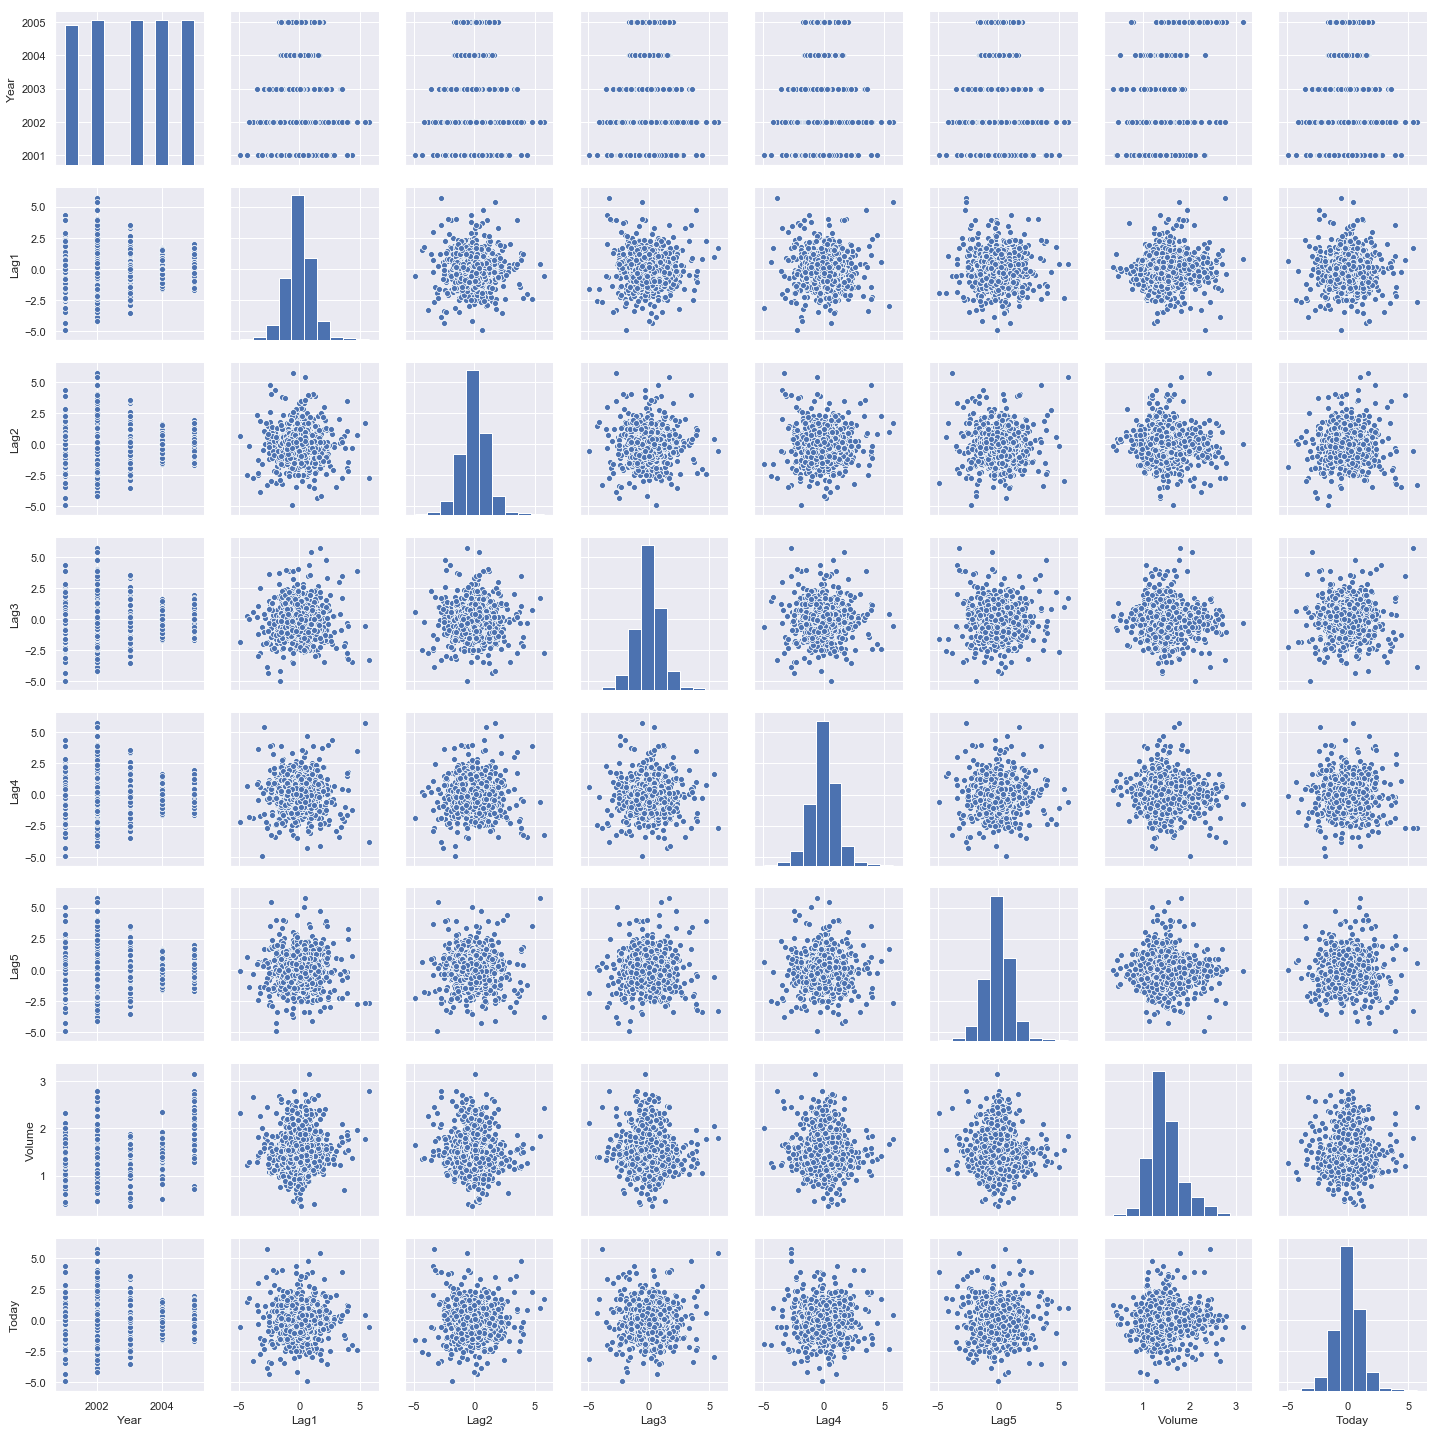

In [30]:
sns.pairplot(df)
plt.show()

#### Correlation Matrix

Equivalent to `cor()` in `R`. Python exludes categorical data by default.

In [31]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


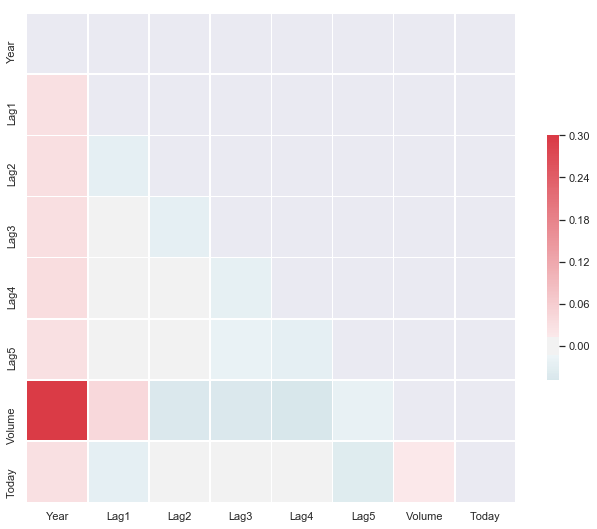

In [28]:
# seaborn heatmap correlation heatmap example
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Plot Volume over the index.

Equivalent to `plot(Volume)`

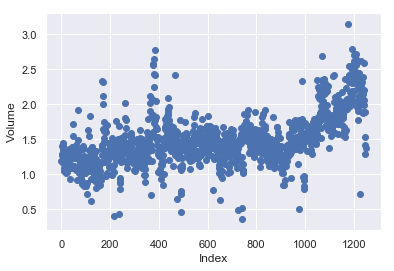

In [34]:
plt.scatter(df.index, df['Volume'])
plt.xlabel("Index")
plt.ylabel("Volume")
plt.show()

#### 4.6.2. Logistic Regression

In [58]:
# convert 'Direction' from 'Yes/No' to 0/1. For ease in modeling.
df['Direction_Up'] = np.where(df['Direction'] == 'Up', 1, 0)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [59]:
glm = smf.logit('Direction_Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=df).fit()
glm.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                0.002074
Time:                        10:24:35   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

#### Access the coefficients of the model

Equiv. to `coef()`

In [95]:
glm.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

#### Access p-values

In [96]:
glm.pvalues

Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

#### Predict

Here, since no data set is supplied to the predict function, then the probabilities are computed for the training data that was used to fit the log reg model.

In [111]:
glm_probs = glm.predict()
glm_probs[:10] # get the first 10 values

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [161]:
glm_pred = np.where(glm_probs>.5, 'Up', 'Down')
glm_pred

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

#### Create confusion matrix

We use `crosstab` from pandas. In this case, equiv to `table()`. 

In [172]:
pd.crosstab(glm_pred, df['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

Actual,Down,Up,All
Predicted,,,
Down,145,141,286
Up,457,507,964
All,602,648,1250


In [169]:
print((507+145)/1250)

0.5216


In [168]:
df.Direction.value_counts(normalize=True)

Up      0.5184
Down    0.4816
Name: Direction, dtype: float64

In [156]:
np.unique(glm_pred, return_counts=True)

(array(['Down', 'Up'], dtype='<U4'), array([286, 964]))

In [173]:
df.Year.value_counts()

2005    252
2004    252
2003    252
2002    252
2001    242
Name: Year, dtype: int64

In [179]:
df_train = df.loc[df['Year'] != 2005]
df_test = df.loc[df['Year'] == 2005]

print("Shape of train: " + str(df_train.shape))
print("Shape of test: " + str(df_test.shape))

Shape of train: (998, 10)
Shape of test: (252, 10)


#### Fit a logisitic regression with train, predict on test.

In [181]:
glm = smf.logit('Direction_Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
               data=df_train).fit()
glm.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                0.001562
Time:                        09:13:29   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [183]:
glm_probs = glm.predict(df_test)
glm_probs[:10] # see the first 10 probs

998     0.528220
999     0.515669
1000    0.522652
1001    0.513854
1002    0.498334
1003    0.501091
1004    0.502770
1005    0.509568
1006    0.504011
1007    0.510641
dtype: float64

In [185]:
# convert probs to predictions ('Up'/'Down')
glm_pred = np.where(glm_probs>.5, 'Up', 'Down')
glm_pred.shape

(252,)

In [186]:
pd.crosstab(glm_pred, df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

Actual,Down,Up,All
Predicted,,,
Down,77,97,174
Up,34,44,78
All,111,141,252


In [187]:
# accuracy
(77+44)/252

0.4801587301587302

In [188]:
# test error rate
(34+97)/252

0.5198412698412699

In [190]:
smf.logit?

In [191]:
df_train.Direction.value_counts(normalize=True)

Up      0.508016
Down    0.491984
Name: Direction, dtype: float64

#### 4.6.3 Linear Discriminant Analysis

In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### Good [reference](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) for loc and iloc for subsetting dataframes

In [221]:
y_train = df_train.loc[:,'Direction']
x_train = df_train.loc[:,('Lag1','Lag2')]

y_test = df_test.loc[:,'Direction']
x_test = df_test.loc[:,('Lag1','Lag2')]

In [200]:
clf = LDA()
lda_fit = clf.fit(x_train, y_train)

In [215]:
# prior probabilities of groups:
lda_fit.priors_

array([0.49198397, 0.50801603])

In [216]:
# group means:
lda_fit.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [218]:
# Coefficients of linear discriminants (doesn't match R or book for some reason)
lda_fit.coef_

array([[-0.05544078, -0.0443452 ]])

In [237]:
pd.crosstab(lda_fit.predict(x_test), df_test['Direction'], rownames=['Predicted'],
           colnames=['Actual'], margins=True)

Actual,Down,Up,All
Predicted,,,
Down,35,35,70
Up,76,106,182
All,111,141,252


In [239]:
# accuracy
(35+106)/252

0.5595238095238095

In [242]:
# error rate
(76+35)/252
#1-((35+106)/252) # can also use 1-accuracy as error rate

0.44047619047619047

In [249]:
lda_pred = lda_fit.predict_proba(x_test)

In [251]:
# .5 threshold
sum(lda_pred>.5)

array([ 70, 182])

In [253]:
# can calculate straight from predict_proba
sum(lda_fit.predict_proba(x_test)>.5)

array([ 70, 182])

In [254]:
# .9 threshold
sum(lda_fit.predict_proba(x_test)>.9)

array([0, 0])